In [53]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [54]:
lena = misc.imread('images/LENA_512.jpg')
lake = misc.imread('images/lake.jpg')
eagle = misc.imread('images/eagle.jpg')
boldt = misc.imread('images/boldt.jpg')
rain = misc.imread('images/rain.jpg')
tex = misc.imread('images/tex.jpg')
kula = misc.imread('images/kula.jpg')
s1 = misc.imread('images/s1.png')
s2 = misc.imread('images/s2.png')
krol1 = misc.imread('images/krol1.png')
krol2 = misc.imread('images/krol2.png')
ok = misc.imread('images/ok.jpg')
ko4 = misc.imread('images/ko4.jpg')

In [55]:
def addcolor(picture, x, y, z):
    addcolor_picture = np.copy(picture)
    for row in addcolor_picture:
        for col in row:
            col[0] = min(col[0] + x, 255)
            col[1] = min(col[1] + y, 255)
            col[2] = min(col[2] + z, 255)
    return addcolor_picture

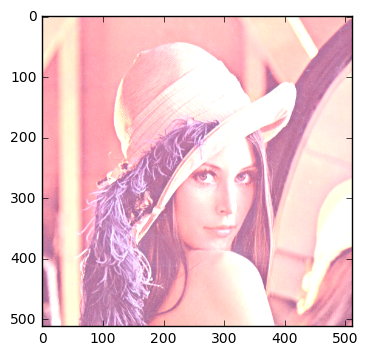

In [56]:
z1 = addcolor(lena, 100, 100, 100)
plt.imshow(z1)
plt.show()

In [57]:
def addscale(pic1, pic2, w):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = w*pic1[x][y][0] + (1-w)*pic2[x][y][0]
            new_picture[x][y][1] = w*pic1[x][y][1] + (1-w)*pic2[x][y][1]
            new_picture[x][y][2] = w*pic1[x][y][2] + (1-w)*pic2[x][y][2]
    return new_picture

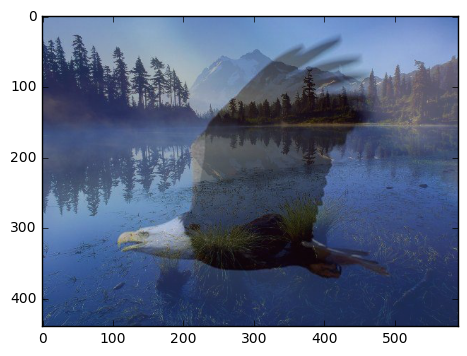

In [58]:
z2a = addscale(lake,eagle,0.5)
plt.imshow(z2a)
plt.show()

In [59]:
def addmax(pic1, pic2, max):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = min(max, int(pic1[x][y][0]) + int(pic2[x][y][0]))
            new_picture[x][y][1] = min(max, int(pic1[x][y][1]) + int(pic2[x][y][1]))
            new_picture[x][y][2] = min(max, int(pic1[x][y][2]) + int(pic2[x][y][2]))
    return new_picture

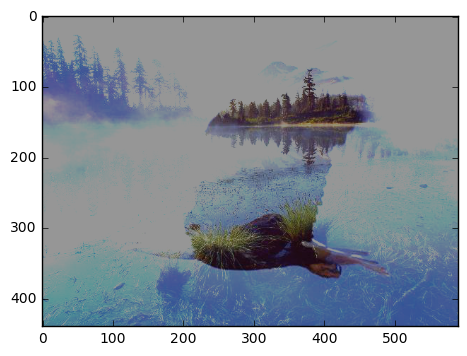

In [60]:
z2b = addmax(lake,eagle,150)
plt.imshow(z2b)
plt.show()

In [61]:
def addmod(pic1, pic2):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = (int(pic1[x][y][0]) + int(pic2[x][y][0]))%256
            new_picture[x][y][1] = (int(pic1[x][y][1]) + int(pic2[x][y][1]))%256
            new_picture[x][y][2] = (int(pic1[x][y][2]) + int(pic2[x][y][2]))%256
    return new_picture

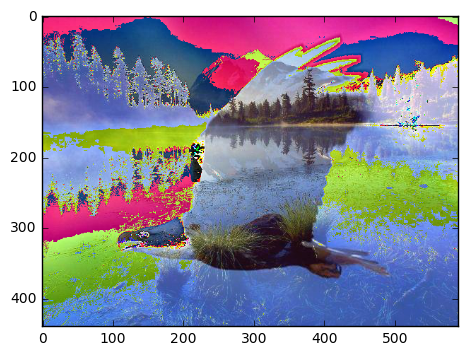

In [62]:
z2c = addmod(lake,eagle)
plt.imshow(z2c)
plt.show()

In [63]:
def addsat(pic1, pic2, w):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = min(255,pic1[x][y][0] + (1-w)*pic2[x][y][0])
            new_picture[x][y][1] = min(255,pic1[x][y][1] + (1-w)*pic2[x][y][1])
            new_picture[x][y][2] = min(255,pic1[x][y][2] + (1-w)*pic2[x][y][2])
    return new_picture

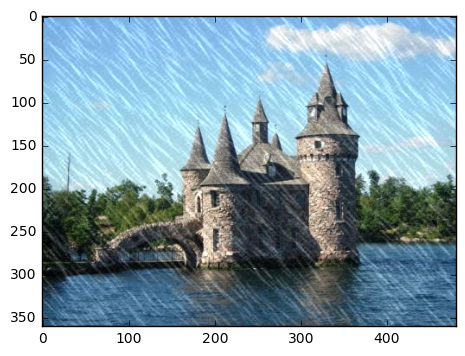

In [64]:
z3 = addsat(boldt,rain,0.1)
plt.imshow(z3)
plt.show()

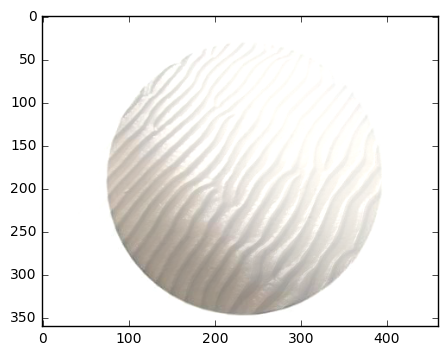

In [65]:
z4 = addsat(kula,tex,0.8)
plt.imshow(z4)
plt.show()

In [66]:
def subscale(pic1, pic2, w):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = max(0,w*pic1[x][y][0] - (1-w)*pic2[x][y][0])
            new_picture[x][y][1] = max(0,w*pic1[x][y][1] - (1-w)*pic2[x][y][1])
            new_picture[x][y][2] = max(0,w*pic1[x][y][2] - (1-w)*pic2[x][y][2])
    return new_picture

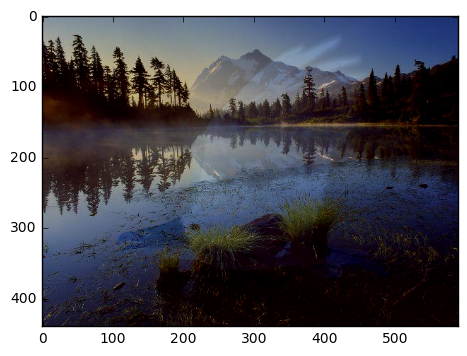

In [67]:
z5a = subscale(lake,eagle,0.8)
plt.imshow(z5a)
plt.show()

In [68]:
def submax(pic1, pic2):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = max(0,int(pic1[x][y][0]) - int(pic2[x][y][0]))
            new_picture[x][y][1] = max(0,int(pic1[x][y][1]) - int(pic2[x][y][1]))
            new_picture[x][y][2] = max(0,int(pic1[x][y][2]) - int(pic2[x][y][2]))
    return new_picture

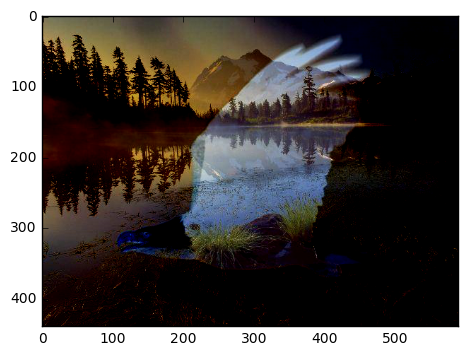

In [69]:
z5b = submax(lake,eagle)
plt.imshow(z5b)
plt.show()

In [70]:
def submod(pic1, pic2):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = (int(pic1[x][y][0]) - int(pic2[x][y][0]) + 256)%256
            new_picture[x][y][1] = (int(pic1[x][y][1]) - int(pic2[x][y][1]) + 256)%256
            new_picture[x][y][2] = (int(pic1[x][y][2]) - int(pic2[x][y][2]) + 256)%256
    return new_picture

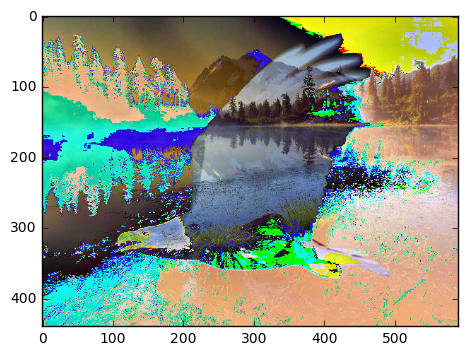

In [71]:
z5c = submod(lake,eagle)
plt.imshow(z5c)
plt.show()

In [72]:
def znajdzroznice(pic1, pic2):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = max(0,int(pic2[x][y][0]) - int(pic1[x][y][0]))
            new_picture[x][y][1] = max(0,int(pic2[x][y][1]) - int(pic1[x][y][1]))
            new_picture[x][y][2] = max(0,int(pic2[x][y][2]) - int(pic1[x][y][2]))
    return new_picture

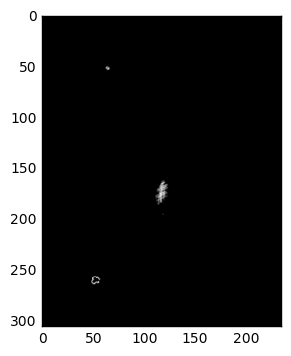

In [73]:
z6a = znajdzroznice(s2,s1)
plt.imshow(z6a)
plt.show()

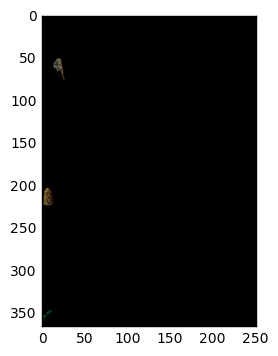

In [74]:
z6b = znajdzroznice(krol2,krol1)
plt.imshow(z6b)
plt.show()

In [75]:
def multiscale(pic1, pic2):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            new_picture[x][y][0] = int(pic1[x][y][0]) * int(pic2[x][y][0]) / 255
            new_picture[x][y][1] = int(pic1[x][y][1]) * int(pic2[x][y][1]) / 255
            new_picture[x][y][2] = int(pic1[x][y][2]) * int(pic2[x][y][2]) / 255
    return new_picture

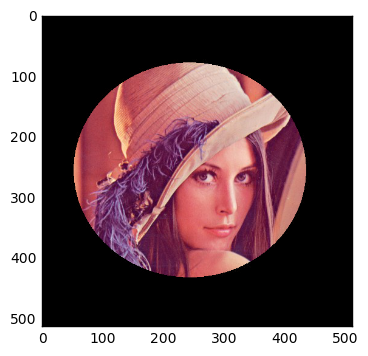

In [76]:
z7a = multiscale(ok,lena)
plt.imshow(z7a)
plt.show()

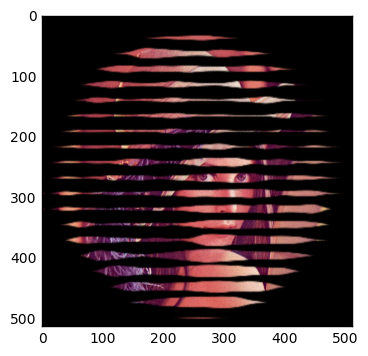

In [77]:
z7b = multiscale(ko4,lena)
plt.imshow(z7b)
plt.show()

In [78]:
def divscale(pic1, pic2):
    new_picture = np.full(np.shape(pic1), 255, dtype=np.uint8)
    for x, row in enumerate(pic2):
        for y, col in enumerate(row):
            if(pic2[x][y][0] != 0): 
                new_picture[x][y][0] = int(pic1[x][y][0]) / int(pic2[x][y][0]) *255
            if(pic2[x][y][1] != 0): 
                new_picture[x][y][1] = int(pic1[x][y][1]) / int(pic2[x][y][1]) *255
            if(pic2[x][y][2] != 0): 
                new_picture[x][y][2] = int(pic1[x][y][2]) / int(pic2[x][y][2]) *255
    return new_picture

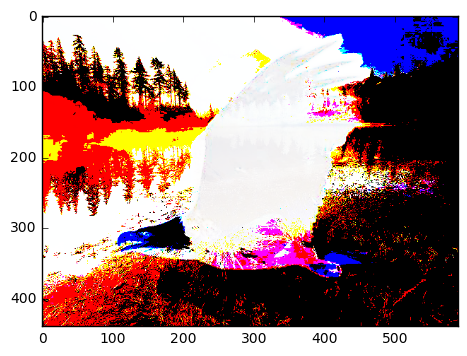

In [79]:
z8 = divscale(lake, eagle)
plt.imshow(z8)
plt.show()

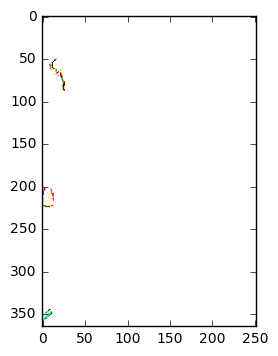

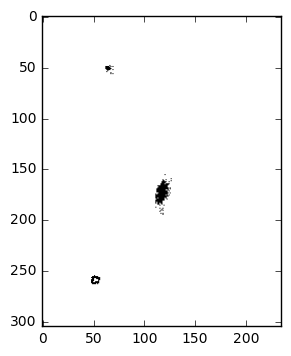

In [80]:
z9 = divscale(krol1, krol2)
plt.imshow(z9)
plt.show()
z9b = divscale(s2, s1)
plt.imshow(z9b)
plt.show()